In [14]:
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Lambda
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import TensorBoard
import os
from glob2 import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2
from time import time
import matplotlib.pyplot as plt
from PIL import Image, ImageChops, ImageStat
import diffimg

In [15]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [16]:
train_dir = 'dataset/nomal_data/train'
test_dir = 'dataset/nomal_data/test'
an_dir = 'data1/anomal_data/'

In [17]:
image_size = (48, 48)
batch_size = 64
datagen=ImageDataGenerator(rescale=1./ 255)
train_gen = datagen.flow_from_directory(train_dir,
                                        target_size=image_size,
                                        batch_size=batch_size,
                                        color_mode='grayscale',
                                        class_mode='input',
                                        shuffle=True)

test_gen = datagen.flow_from_directory(test_dir,
                                       target_size=image_size,
                                       batch_size=batch_size,
                                       color_mode='grayscale',
                                       class_mode='input')
an_gen = datagen.flow_from_directory(an_dir,
                                     target_size=image_size,
                                     batch_size=batch_size,
                                     color_mode='grayscale',
                                     class_mode='input')

Found 411 images belonging to 1 classes.
Found 96 images belonging to 1 classes.
Found 22 images belonging to 1 classes.


In [18]:
latent_dim = 64 
class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(2304, activation='sigmoid'),
      layers.Reshape((48,48,1))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss='MAE',metrics=['accuracy'])
tensorboard = TensorBoard(log_dir='logs\\{}'.format(time()))
autoencoder.build((64,48,48,1))
autoencoder.summary()


InternalError: cudaGetDevice() failed. Status: CUDA driver version is insufficient for CUDA runtime version

In [42]:
history=autoencoder.fit(train_gen,
                epochs=200,
#                 batch_size=64,
                shuffle=True,
                validation_data=test_gen,
                callbacks=[tensorboard]
                )

  ...
    to  
  ['...']
Train for 7 steps, validate for 2 steps
Epoch 1/200
7/7 [==============================] - 0s 68ms/step - loss: 0.0742 - accuracy: 0.0000e+00 - val_loss: 0.0440 - val_accuracy: 0.0000e+00
Epoch 2/200
7/7 [==============================] - 0s 35ms/step - loss: 0.0587 - accuracy: 0.0000e+00 - val_loss: 0.0377 - val_accuracy: 0.0000e+00
Epoch 3/200
7/7 [==============================] - 0s 38ms/step - loss: 0.0481 - accuracy: 0.0000e+00 - val_loss: 0.0348 - val_accuracy: 0.0000e+00
Epoch 4/200
7/7 [==============================] - 0s 39ms/step - loss: 0.0436 - accuracy: 0.0000e+00 - val_loss: 0.0489 - val_accuracy: 0.0000e+00
Epoch 5/200
7/7 [==============================] - 0s 39ms/step - loss: 0.0425 - accuracy: 0.0000e+00 - val_loss: 0.0414 - val_accuracy: 0.0000e+00
Epoch 6/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0421 - accuracy: 0.0000e+00 - val_loss: 0.0294 - val_accuracy: 0.0000e+00
Epoch 7/200
7/7 [==============================

7/7 [==============================] - 0s 34ms/step - loss: 0.0397 - accuracy: 0.0000e+00 - val_loss: 0.0324 - val_accuracy: 0.0000e+00
Epoch 111/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0397 - accuracy: 0.0000e+00 - val_loss: 0.0352 - val_accuracy: 0.0000e+00
Epoch 112/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0394 - accuracy: 0.0000e+00 - val_loss: 0.0362 - val_accuracy: 0.0000e+00
Epoch 113/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0390 - accuracy: 0.0000e+00 - val_loss: 0.0356 - val_accuracy: 0.0000e+00
Epoch 114/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0390 - accuracy: 0.0000e+00 - val_loss: 0.0378 - val_accuracy: 0.0000e+00
Epoch 115/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0389 - accuracy: 0.0000e+00 - val_loss: 0.0332 - val_accuracy: 0.0000e+00
Epoch 116/200
7/7 [==============================] - 0s 33ms/step - loss: 0.0389 - accuracy: 0.0000e+00 - val_loss

Epoch 165/200
7/7 [==============================] - 0s 35ms/step - loss: 0.0378 - accuracy: 0.0000e+00 - val_loss: 0.0329 - val_accuracy: 0.0000e+00
Epoch 166/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0371 - accuracy: 0.0000e+00 - val_loss: 0.0337 - val_accuracy: 0.0000e+00
Epoch 167/200
7/7 [==============================] - 0s 38ms/step - loss: 0.0371 - accuracy: 0.0000e+00 - val_loss: 0.0331 - val_accuracy: 0.0000e+00
Epoch 168/200
7/7 [==============================] - 0s 35ms/step - loss: 0.0371 - accuracy: 0.0000e+00 - val_loss: 0.0422 - val_accuracy: 0.0000e+00
Epoch 169/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0376 - accuracy: 0.0000e+00 - val_loss: 0.0409 - val_accuracy: 0.0000e+00
Epoch 170/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0376 - accuracy: 0.0000e+00 - val_loss: 0.0389 - val_accuracy: 0.0000e+00
Epoch 171/200
7/7 [==============================] - 0s 35ms/step - loss: 0.0375 - accuracy: 0.0000e

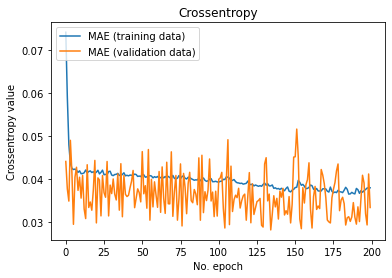

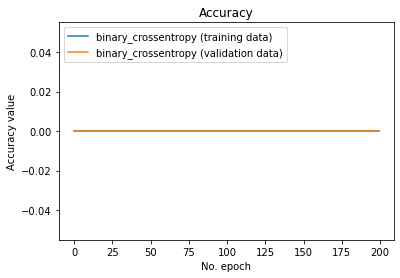

In [44]:
plot1 = plt.figure(1)
plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('Crossentropy')
plt.ylabel('Crossentropy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")

plot2 = plt.figure(2)
plt.plot(history.history['accuracy'], label='binary_crossentropy (training data)')
plt.plot(history.history['val_accuracy'], label='binary_crossentropy (validation data)')
plt.title('Accuracy')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")

plt.show()

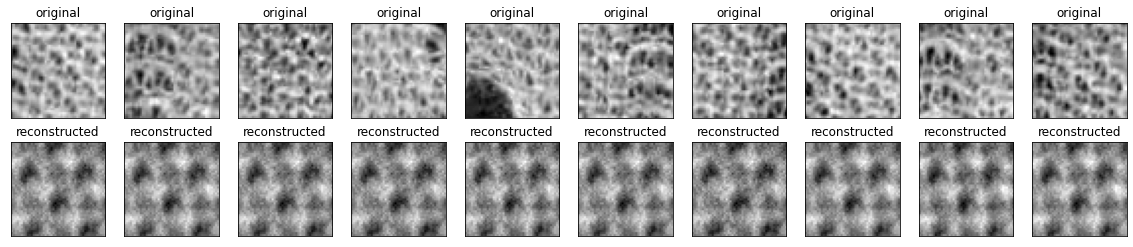

In [46]:
def show_imgs(xs, decoded_imgs):
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(xs[i].squeeze())
        plt.title("original")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].squeeze())
        plt.title("reconstructed")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

xs, ys = next(an_gen)
encoded_imgs = autoencoder.encoder(xs).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
show_imgs(xs, decoded_imgs)

In [137]:
class DeepAutoEncoder(Model):
  def __init__(self):
    super(DeepAutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(128, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(32, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(128, activation="relu"),
      layers.Dense(2304, activation="sigmoid"),
      layers.Reshape((48,48,1)),
    ])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder2 = DeepAutoEncoder()
autoencoder2.compile(optimizer='adam', loss='mae')
autoencoder2.build((64,48,48,1))
autoencoder2.summary()

Model: "deep_auto_encoder_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_92 (Sequential)   multiple                  305376    
_________________________________________________________________
sequential_93 (Sequential)   multiple                  307648    
Total params: 613,024
Trainable params: 613,024
Non-trainable params: 0
_________________________________________________________________


In [109]:
history=autoencoder2.fit(train_gen,
                epochs=200,
#                 batch_size=64,
                shuffle=True,
                validation_data=test_gen,
                )

  ...
    to  
  ['...']
Train for 7 steps, validate for 2 steps
Epoch 1/200
7/7 [==============================] - 1s 77ms/step - loss: 0.0704 - val_loss: 0.0458
Epoch 2/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0469 - val_loss: 0.0433
Epoch 3/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0432 - val_loss: 0.0404
Epoch 4/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0423 - val_loss: 0.0385
Epoch 5/200
7/7 [==============================] - 0s 36ms/step - loss: 0.0418 - val_loss: 0.0394
Epoch 6/200
7/7 [==============================] - 0s 35ms/step - loss: 0.0415 - val_loss: 0.0350
Epoch 7/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0413 - val_loss: 0.0362
Epoch 8/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0413 - val_loss: 0.0396
Epoch 9/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0412 - val_loss: 0.0390
Epoch 10/200
7/7 [==============================] - 0

7/7 [==============================] - 0s 34ms/step - loss: 0.0279 - val_loss: 0.0204
Epoch 165/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0279 - val_loss: 0.0205
Epoch 166/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0279 - val_loss: 0.0208
Epoch 167/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0279 - val_loss: 0.0205
Epoch 168/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0279 - val_loss: 0.0206
Epoch 169/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0280 - val_loss: 0.0208
Epoch 170/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0279 - val_loss: 0.0206
Epoch 171/200
7/7 [==============================] - 0s 35ms/step - loss: 0.0281 - val_loss: 0.0206
Epoch 172/200
7/7 [==============================] - 0s 36ms/step - loss: 0.0279 - val_loss: 0.0207
Epoch 173/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0278 - val_loss: 0.0205
Epoch 174/200


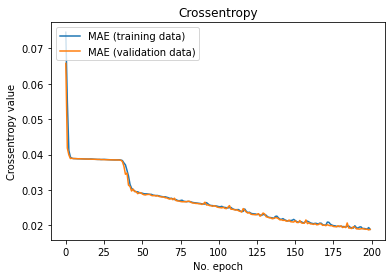

In [140]:
plot1 = plt.figure(1)
plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('Crossentropy')
plt.ylabel('Crossentropy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")


plt.show()

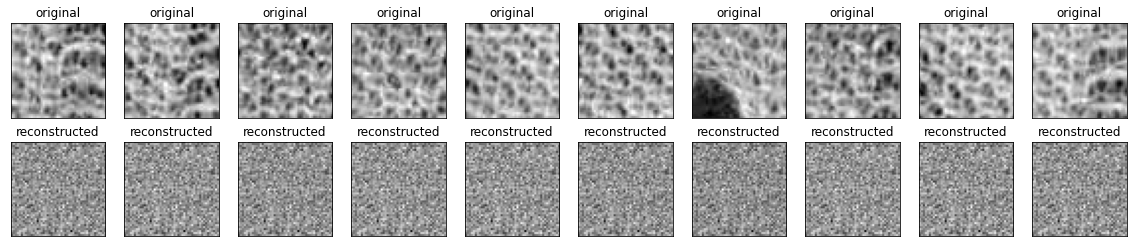

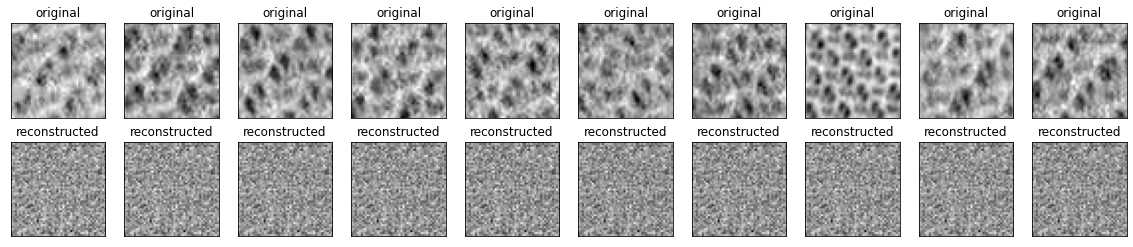

In [141]:
xs, ys = next(an_gen)
encoded_imgs = autoencoder2.encoder(xs).numpy()
decoded_imgs = autoencoder2.decoder(encoded_imgs).numpy()
K.int_shape(decoded_imgs.squeeze())
show_imgs(xs, decoded_imgs)

xs, ys = next(train_gen)
encoded_imgs = autoencoder2.encoder(xs).numpy()
decoded_imgs = autoencoder2.decoder(encoded_imgs).numpy()
K.int_shape(decoded_imgs.squeeze())
show_imgs(xs, decoded_imgs)

In [5]:
image_size = (48, 48)
batch_size = 64
datagen=ImageDataGenerator(rescale=1./ 255)
train_gen = datagen.flow_from_directory(train_dir,
                                        target_size=image_size,
                                        batch_size=batch_size,
                                        color_mode='grayscale',
                                        class_mode='input',
                                        shuffle=True)

test_gen = datagen.flow_from_directory(test_dir,
                                       target_size=image_size,
                                       batch_size=batch_size,
                                       color_mode='grayscale',
                                       class_mode='input')
an_gen = datagen.flow_from_directory(an_dir,
                                     target_size=image_size,
                                     batch_size=batch_size,
                                     color_mode='grayscale',
                                     class_mode='input')

Found 411 images belonging to 1 classes.
Found 96 images belonging to 1 classes.
Found 22 images belonging to 1 classes.


In [6]:
my_callbacks = [
    tf.keras.callbacks.ModelCheckpoint("./CNN", monitor='val_loss', verbose=1, save_best_only=True, mode='auto', period=1, save_freq='epoch')#save_weights_only=True, 
]

In [7]:
class convolutional(Model):
    def __init__(self):
        super(convolutional, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
           layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
           layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
           layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
           layers.Conv2DTranspose(128, kernel_size=3, strides=2, activation='relu', padding='same'),
           layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder3 = convolutional()
autoencoder3.compile(optimizer='adam', loss='mae')
autoencoder3.build((64,48,48,1))
autoencoder3.summary()

InternalError: cudaGetDevice() failed. Status: CUDA driver version is insufficient for CUDA runtime version

In [1]:
history=autoencoder3.fit(train_gen,
                epochs=200,
#                 batch_size=64,
                shuffle=True,
                validation_data=train_gen,
                callbacks = my_callbacks
                )

NameError: name 'autoencoder3' is not defined

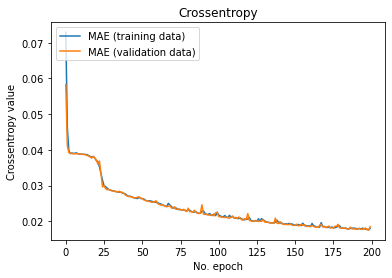

In [146]:
plot1 = plt.figure(1)
plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('Crossentropy')
plt.ylabel('Crossentropy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")


plt.show()

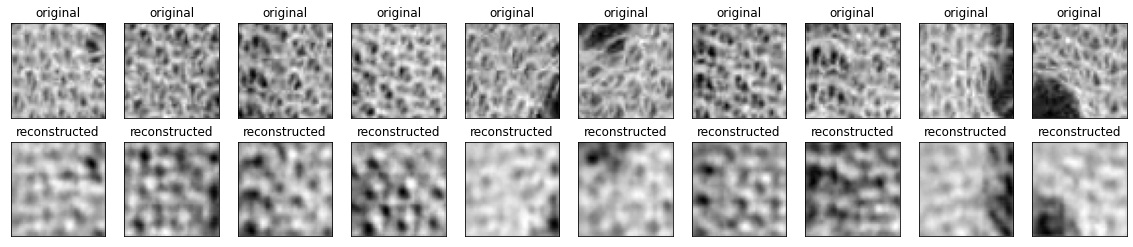

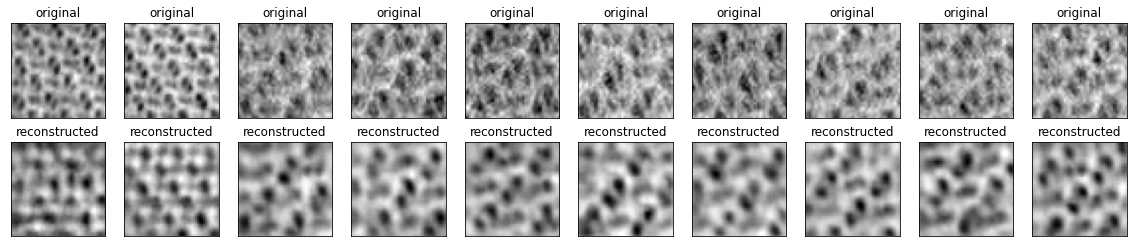

In [147]:
xs, ys = next(an_gen)
encoded_imgs = autoencoder3.encoder(xs).numpy()
decoded_imgs = autoencoder3.decoder(encoded_imgs).numpy()
K.int_shape(decoded_imgs.squeeze())
show_imgs(xs, decoded_imgs)

xs, ys = next(train_gen)
encoded_imgs = autoencoder3.encoder(xs).numpy()
decoded_imgs = autoencoder3.decoder(encoded_imgs).numpy()
K.int_shape(decoded_imgs.squeeze())
show_imgs(xs, decoded_imgs)

In [148]:
image_size = (48, 48)
batch_size = 64
datagen=ImageDataGenerator(rescale=1./ 255)
train_gen = datagen.flow_from_directory(train_dir,
                                        target_size=image_size,
                                        batch_size=batch_size,
                                        color_mode='grayscale',
                                        class_mode='input',
                                        shuffle=True)

test_gen = datagen.flow_from_directory(test_dir,
                                       target_size=image_size,
                                       batch_size=batch_size,
                                       color_mode='grayscale',
                                       class_mode='input')
an_gen = datagen.flow_from_directory(an_dir,
                                     target_size=image_size,
                                     batch_size=batch_size,
                                     color_mode='grayscale',
                                     class_mode='input')

Found 411 images belonging to 1 classes.
Found 96 images belonging to 1 classes.
Found 22 images belonging to 1 classes.


In [99]:
class CNN(Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Conv2D(8, 3, activation='relu', padding='same', strides=2),
            layers.Conv2D(16, 3, activation='relu'),
            layers.Conv2D(16, 3, activation='relu', padding='same', strides=2),
            layers.Conv2D(16, 3, activation='relu', padding='same', strides=2),
            layers.Conv2D(32, 3, activation='relu', padding='same', strides=2),
            layers.Conv2D(64, 3, activation='relu'),
            layers.Flatten(),
            layers.Dense(256, activation='relu'),
            layers.Dense(128, activation='relu'),
            
        ])

        self.decoder = tf.keras.Sequential([
            layers.Dense(256, activation='relu'),
            layers.Dense(1024, activation='relu'),
            layers.Reshape((4,4,64)),
            layers.Conv2DTranspose(64, 3, activation='relu'),
            layers.Conv2DTranspose(32, 3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(16, 3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(16, 3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(16, 3, activation='relu'),
            layers.Conv2DTranspose(8, 3, strides=2, activation='relu', padding='same'),
            layers.Conv2D(1, 3, activation='relu', padding='same'),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


autoencoder4= CNN()
autoencoder4.build((64,48,48,1))
autoencoder4.encoder.summary()
autoencoder4.decoder.summary()

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_149 (Conv2D)          multiple                  80        
_________________________________________________________________
conv2d_150 (Conv2D)          multiple                  1168      
_________________________________________________________________
conv2d_151 (Conv2D)          multiple                  2320      
_________________________________________________________________
conv2d_152 (Conv2D)          multiple                  4640      
_________________________________________________________________
conv2d_153 (Conv2D)          multiple                  18496     
_________________________________________________________________
flatten_33 (Flatten)         multiple                  0         
_________________________________________________________________
dense_116 (Dense)            multiple                

In [ ]:
autoencoder4.compile(optimizer='adam', loss='mae')
history=autoencoder4.fit(train_gen,
                epochs=200,
#                 batch_size=64,
                shuffle=True,
                validation_data=test_gen,
                )

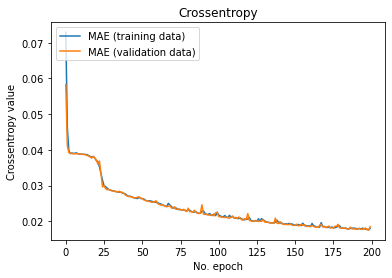

In [155]:
plot1 = plt.figure(1)
plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('Crossentropy')
plt.ylabel('Crossentropy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")


plt.show()

In [152]:
# autoencoder3.save('./model/cnn')
tf.saved_model.save(autoencoder3, "./model/cnn")

INFO:tensorflow:Assets written to: ./model/cnn\assets


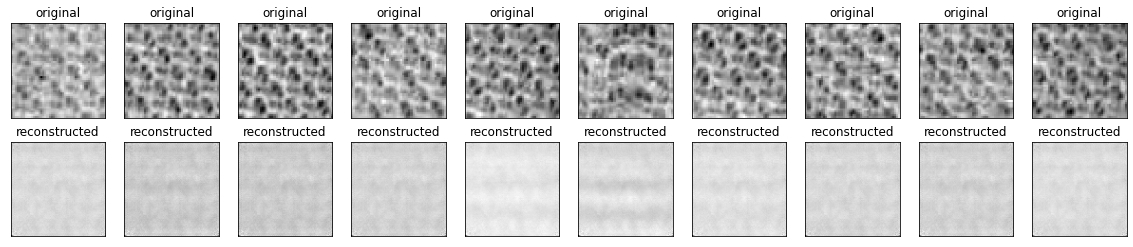

In [74]:
xs, ys = next(train_gen)
encoded_imgs = autoencoder4.encoder(xs).numpy()
decoded_imgs = autoencoder4.decoder(encoded_imgs).numpy()
show_imgs(xs, decoded_imgs)

In [156]:
# %load "test/test.py"  
import cv2
import tensorflow as tf
import numpy as np
from os import listdir
from os.path import join
import time

model = tf.keras.models.load_model('model/cnn')


def cv2tf_img(img):
    img = np.asarray(img)
    img = np.expand_dims(img, axis=-1)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img


def is_anomal(r, x, threshold):

    return np.square(r - x).mean() >= threshold


def predict(frame, threshold):
    stride = 50
    size =100
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    h, w = img.shape
    num_row = ((h - size) // stride) + 1
    num_col = ((w - size) // stride) + 1

    for i in range(num_row):
        for j in range(num_col):
            eq_img = cv2.equalizeHist(img[i * stride: size + (i * stride), j * stride: size + (j * stride)])
            inp_img = cv2tf_img(eq_img)
            re_img = model.predict(tf.stack([inp_img]))
            if is_anomal(re_img, inp_img, threshold):
                cv2.rectangle(frame, (j * stride, i * stride), (size + (j * stride), size + (i * stride)), (0, 0, 255),
                              -1)

    return frame


if __name__ == '__main__':
    fld = './error/'
    threshold = 0.045
    for i, f in enumerate(listdir(fld)):
        frame = cv2.imread(join(fld, f))
        time_start = time.time()
        frame = predict(frame, threshold)
        time_end = time.time()
        print(f'img-{i} cost time : {time_end - time_start} sec')

        cv2.imwrite(f'./error_result/{i}.bmp', frame)


ValueError: Could not find matching function to call loaded from the SavedModel. Got:
  Positional arguments (2 total):
    * Tensor("x:0", shape=(None, 48, 48, 1), dtype=float32)
    * Tensor("training:0", shape=(), dtype=bool)
  Keyword arguments: {}

Expected these arguments to match one of the following 4 option(s):

Option 1:
  Positional arguments (2 total):
    * TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name='x')
    * False
  Keyword arguments: {}

Option 2:
  Positional arguments (2 total):
    * TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name='x')
    * True
  Keyword arguments: {}

Option 3:
  Positional arguments (2 total):
    * TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name='input_1')
    * False
  Keyword arguments: {}

Option 4:
  Positional arguments (2 total):
    * TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name='input_1')
    * True
  Keyword arguments: {}

In [63]:
#錯誤比對函數 diff()
im1="error_result/1.jpg"
im2="error/8.jpg"
print(diff(im1,im2))

0.05598240740740741
